In [170]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tifffile as tfl
#from skimage import io

In [171]:
df=pd.read_csv('train_v4.csv',header=0)
bldg=df[df['ClassType']==1]
bldg=bldg[bldg['MultipolygonWKT']!='MULTIPOLYGON EMPTY']

In [172]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.289, 0.587, 0.119])

def scale_percentile(matrix):
    w, h, d = matrix.shape
    matrix = np.reshape(matrix, [w * h, d]).astype(np.float64)
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 0, axis=0)
    maxs = np.percentile(matrix, 100, axis=0) - mins
    matrix = (matrix - mins[None, :]) / (maxs[None, :])
    matrix = np.reshape(matrix, [w, h, d])
    matrix = matrix.clip(0, 1)
    return matrix

In [174]:
#THIS PART SAVES ORIGINAL TIF FILES AS RESCALED ONES
#THEN THEY CAN BE OUTPUT IN GRAYSCALE USING MATPLOTLIB

#This has to be parallelized in order to work faster on more than 10-15 files 
#(it takes about a minute for all the building images we have got.)


path = 'three_band/'
for each in bldg.ImageId.tolist():
    imName = path + each + '.tif'
    im_rgb = tfl.imread(imName).transpose([1,2,0])
    im_rgb = scale_percentile(im_rgb)
    im_gray = rgb2gray(im_rgb)
    im_gray = np.array([im_gray, im_gray, im_gray]).transpose([1,2,0])
    im_gray = scale_percentile(im_gray)
    tfl.imsave(path + each + '_gray' + '.tif', im_gray)

In [176]:
imName = 'three_band/6120_2_0_gray.tif'
gray=tfl.imread(imName)#.transpose([1,2,0])
#im_rgb = scale_percentile(im_rgb)
#im_size = im_gray.shape[:2]

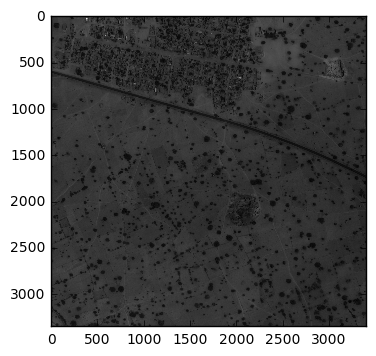

In [177]:
plt.imshow(gray)